# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
ans = 3
print(ans)

3


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics



In [3]:
import textwrap
import warnings
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Check for missing values in percent

df.isna().mean().mul(100).round(2)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [8]:
print('Shape before treating duplicates: ' + str(df.shape))
print('Duplicates : ' + str(df.duplicated().sum()))
# remove duplicates
df.drop_duplicates(inplace = True)
print('Shape post treating duplicates: ' + str(df.shape))

Shape before treating duplicates: (41188, 21)
Duplicates : 12
Shape post treating duplicates: (41176, 21)


In [9]:
# Examine catagorical features identified for transformation using Hot-Coding and other methods. For example, 'month' to values, etc.

col_list = df.select_dtypes(include=['object', 'category']).columns.tolist()
print('_________________________________________\n')
for col in col_list:
    print('Feature: ' + str(col))
    category = df[col].value_counts().div(df.shape[0]).mul(100).round(2)
    category_df = category.reset_index()
    category_df.columns = ['category', 'freq in %']
    print(category_df)
    print('_________________________________________\n')

_________________________________________

Feature: job
         category  freq in %
0          admin.      25.30
1     blue-collar      22.47
2      technician      16.37
3        services       9.63
4      management       7.10
5         retired       4.17
6    entrepreneur       3.54
7   self-employed       3.45
8       housemaid       2.57
9      unemployed       2.46
10        student       2.13
11        unknown       0.80
_________________________________________

Feature: marital
   category  freq in %
0   married      60.52
1    single      28.08
2  divorced      11.20
3   unknown       0.19
_________________________________________

Feature: education
              category  freq in %
0    university.degree      29.54
1          high.school      23.10
2             basic.9y      14.68
3  professional.course      12.73
4             basic.4y      10.14
5             basic.6y       5.56
6              unknown       4.20
7           illiterate       0.04
________________________

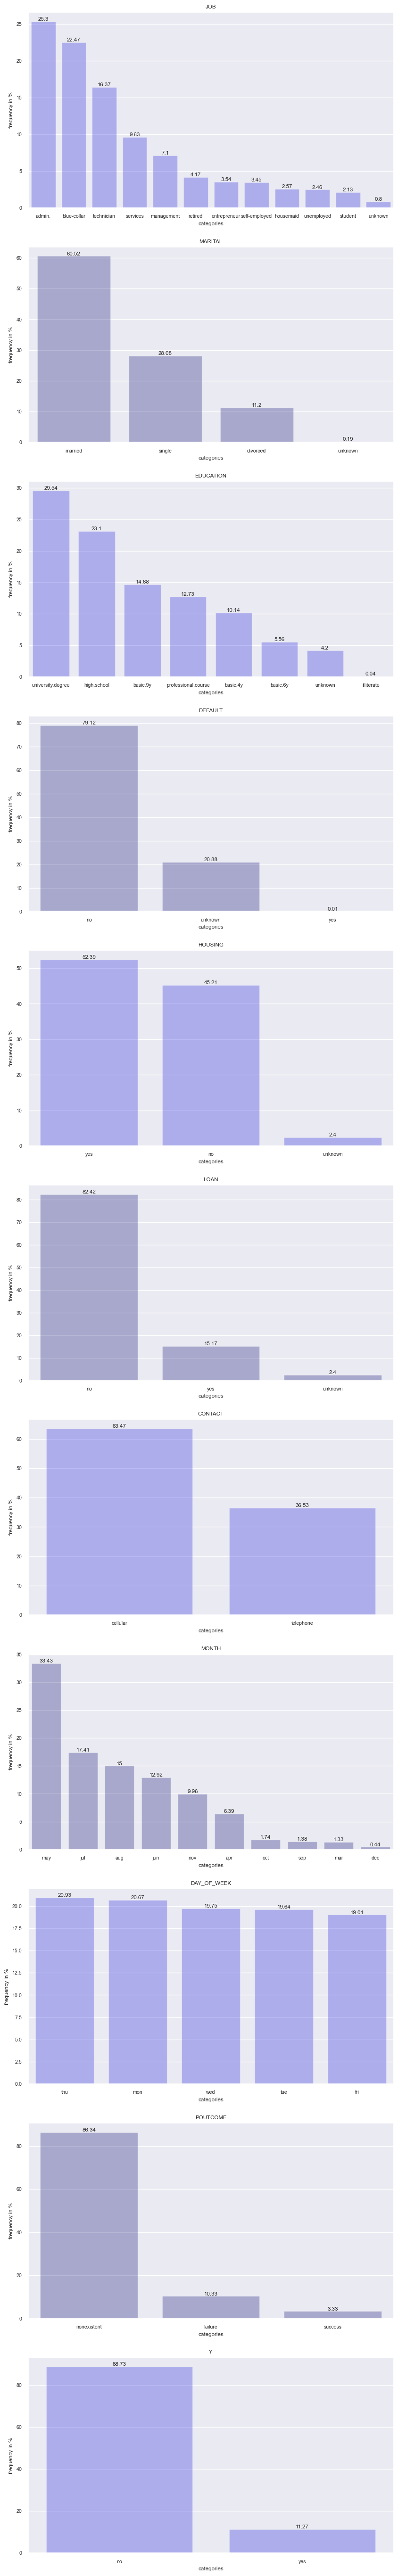

In [10]:
sns.set(style="darkgrid",font_scale=0.7)
col_list = df.select_dtypes(include=['object', 'category']).columns.tolist()
fig, axs = plt.subplots(len(col_list), 1, figsize=(10, 70))
i = 0
c='blue'
for col in col_list:
    category = df[col].value_counts().div(df.shape[0]).mul(100).round(2)
    category_df = category.reset_index()
    category_df.columns = ['categories', 'frequency']
    ax = sns.barplot(x = category_df.categories, y=category_df.frequency, ci=None, alpha=0.3, color=c, ax=axs[i])
    ax.set_title(str(col).upper()) 
    ax.set_ylabel("frequency in %")
    for container in ax.containers:
        ax.bar_label(container)
    i = i + 1
    if (i % 2):
        c='darkblue'
    else:
        c='blue'

plt.savefig('images/bar_categories.png')
plt.show()
    

In [11]:
# Function to plot histogram
def histogram_boxplot(df_, col):
    sns.set(style="darkgrid",font_scale=0.8)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15, 5))
    sns.boxplot(df_[col], color='lightblue',orient="h", ax=ax_box)
    sns.histplot(df_[col], bins=50, alpha=0.4, kde=True, stat='density', ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    plt.savefig('images/box_hist_' + str(col) + '_dist.png')
    plt.show()

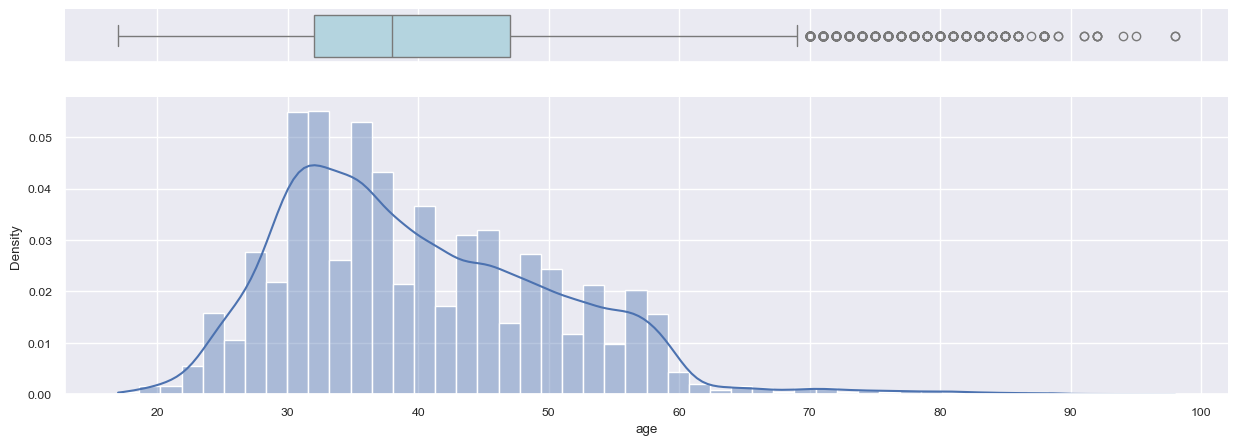

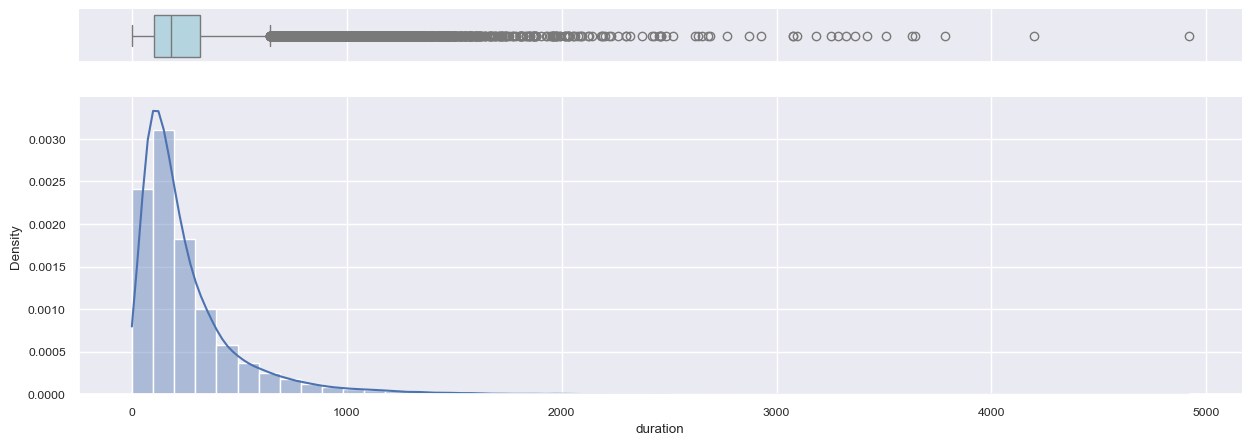

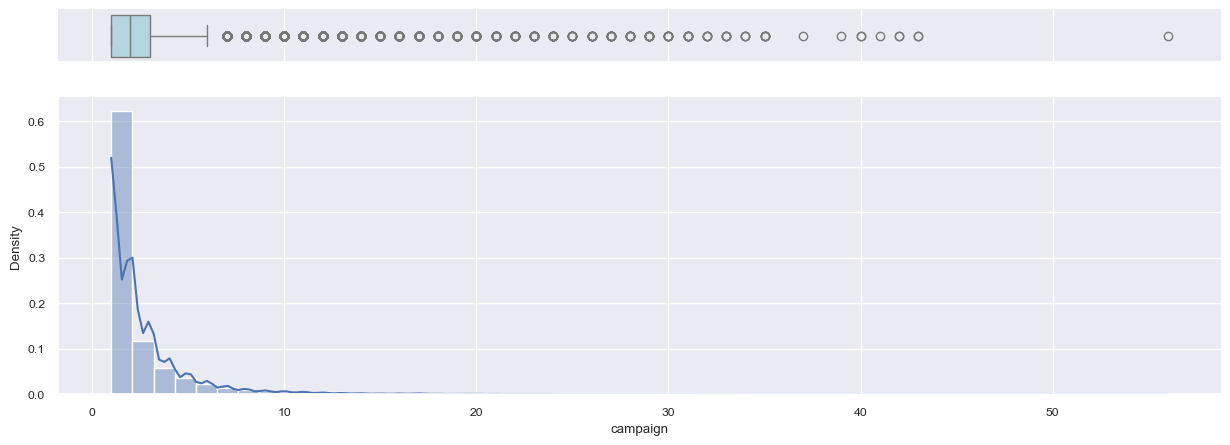

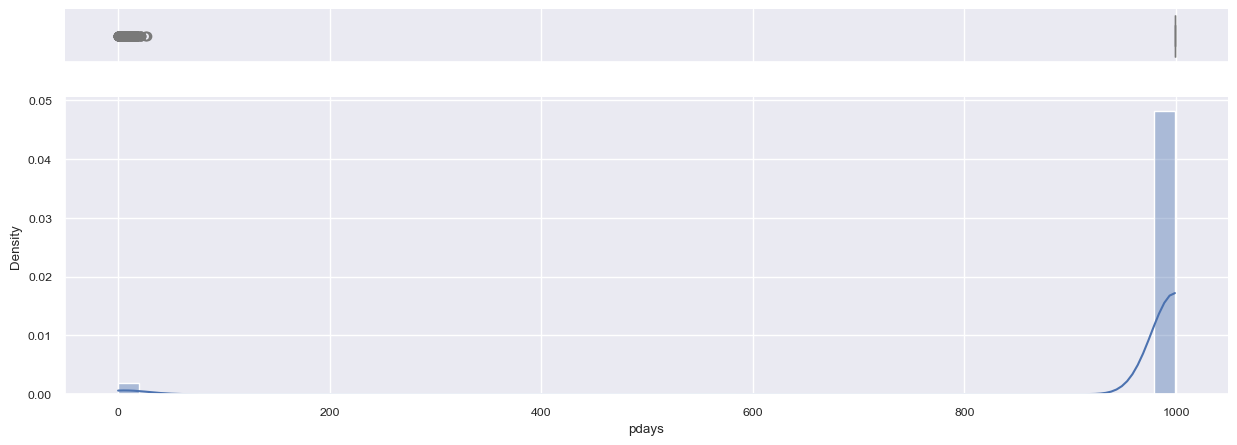

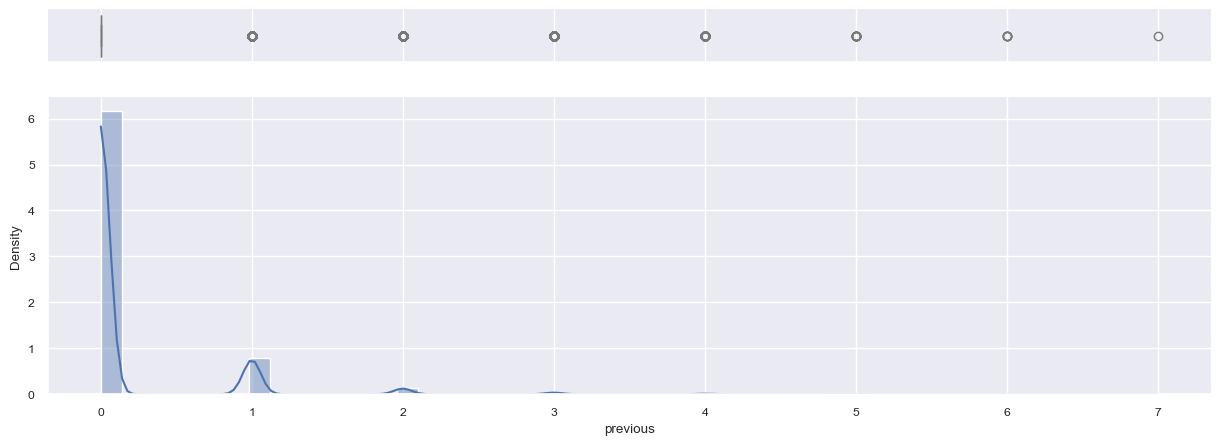

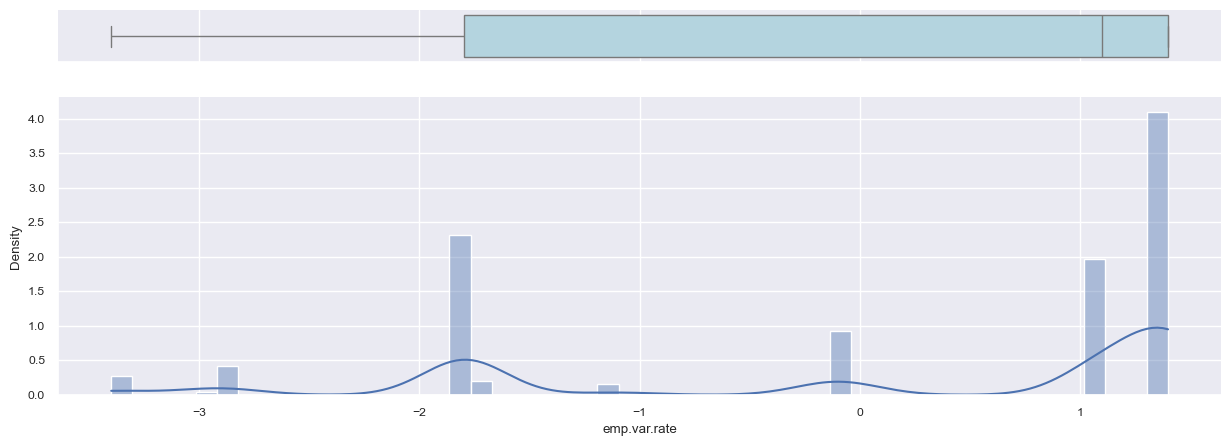

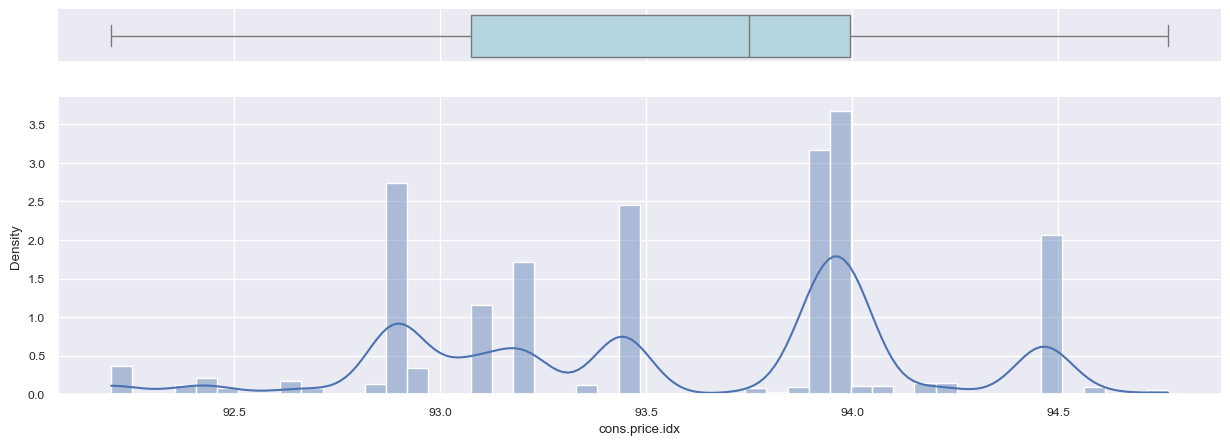

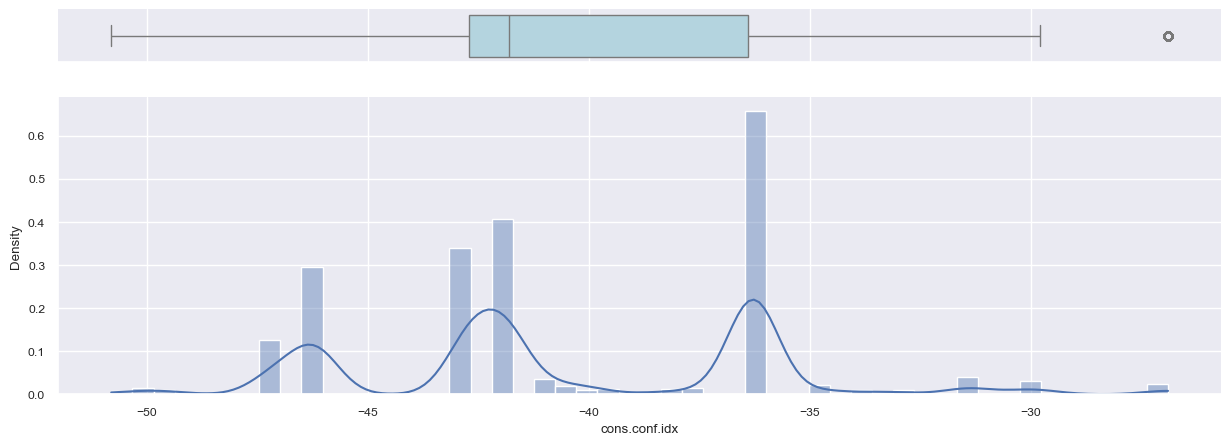

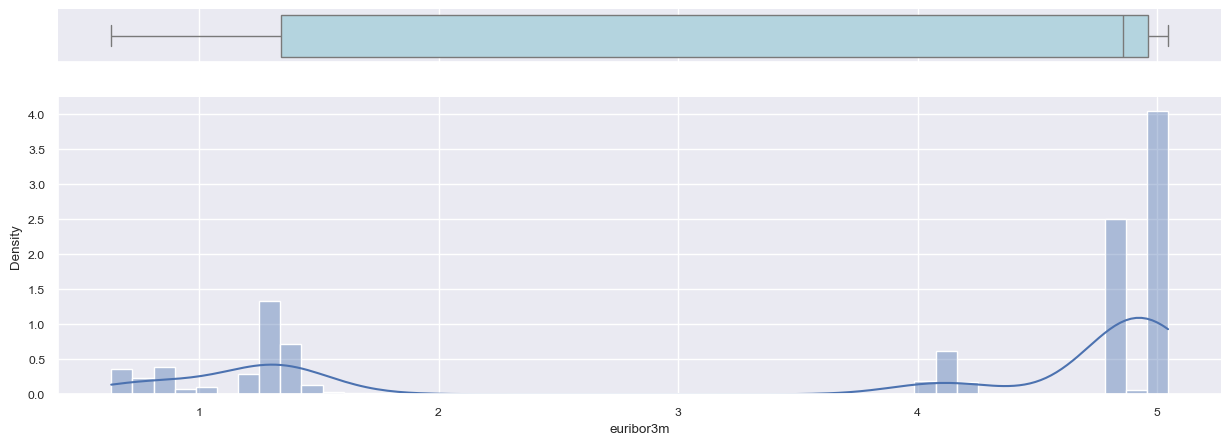

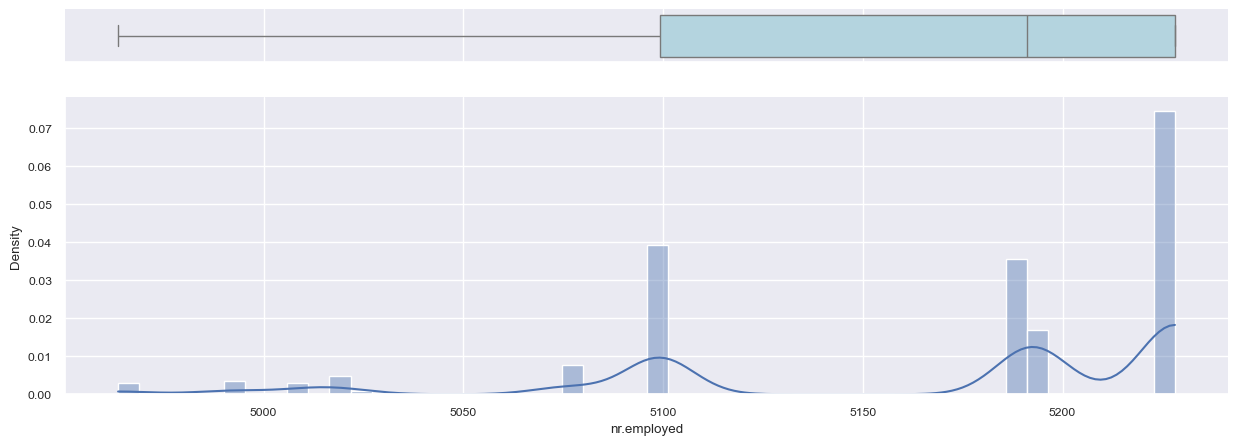

In [12]:
# Lets examine the numerical feature distribution
col_list = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in col_list:  
    histogram_boxplot(df, col)


In [13]:
# Lets convery the target feature 'y' and vew the correlation between the numeric features and Y
df_trans =df.copy(deep=True)
df_trans['y'] = df_trans['y'].replace({'no': 0, 'yes': 1})

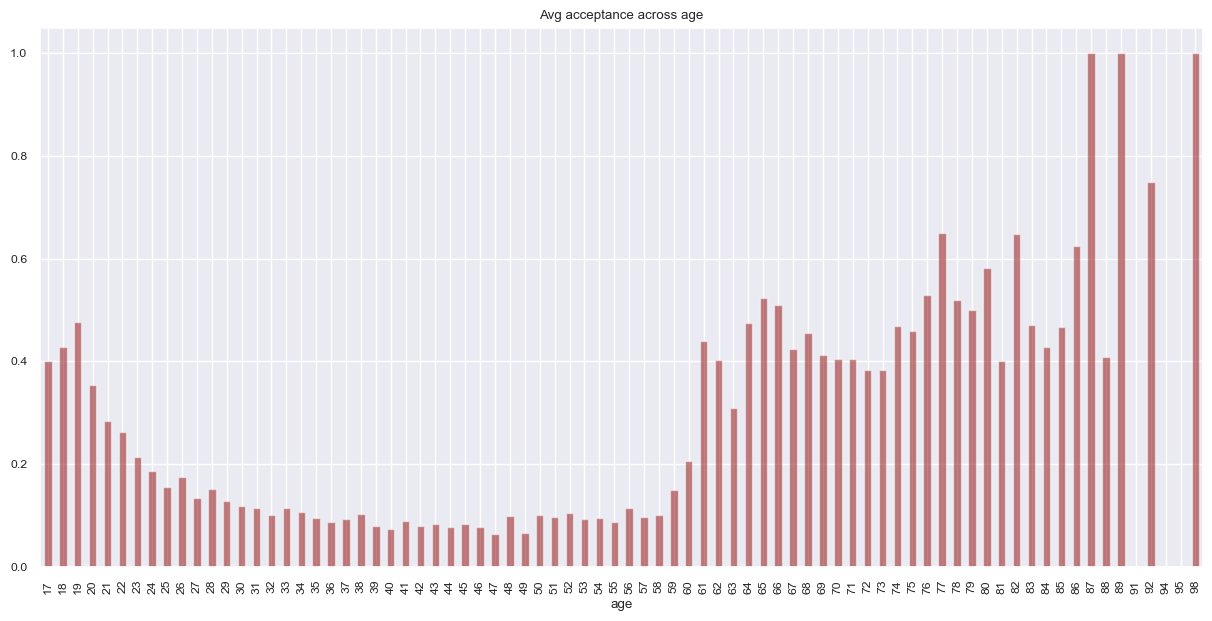

In [14]:
plt.figure(figsize = (15,7))
df_trans.groupby('age')['y'].mean().plot(kind='bar', title='Avg acceptance across age', color='darkred', alpha=0.5)
plt.savefig('images/accept_age.png')
plt.show()

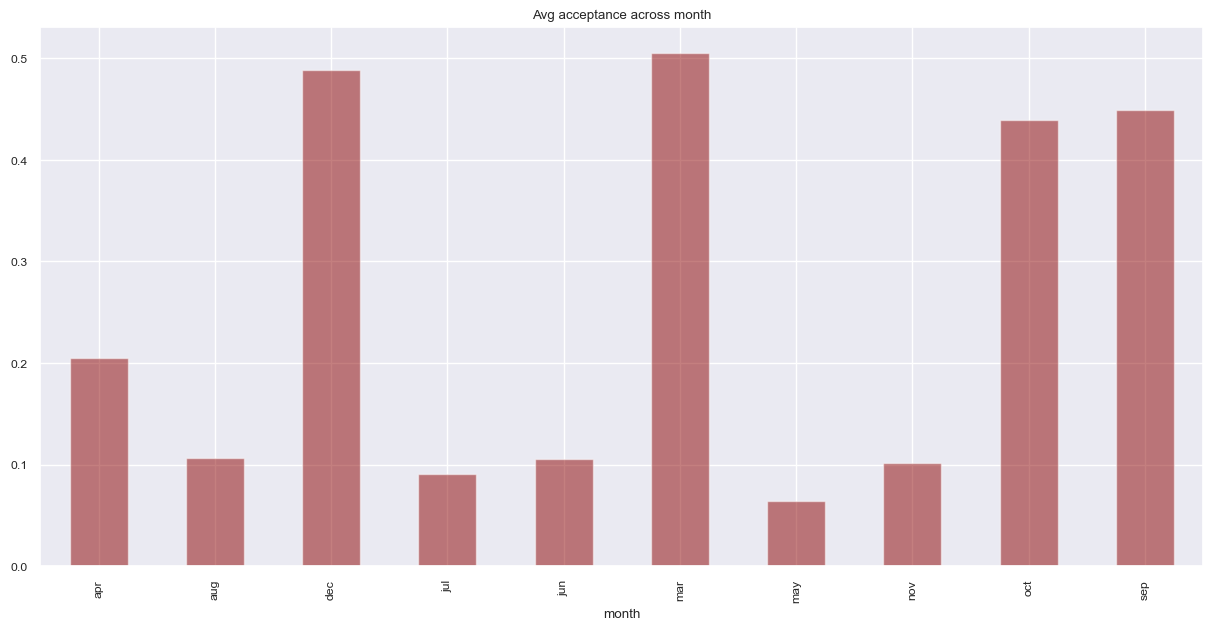

In [15]:
plt.figure(figsize = (15,7))
df_trans.groupby('month')['y'].mean().plot(kind='bar', title='Avg acceptance across month', color='darkred', alpha=0.5)
plt.savefig('images/accept_month.png')
plt.show()

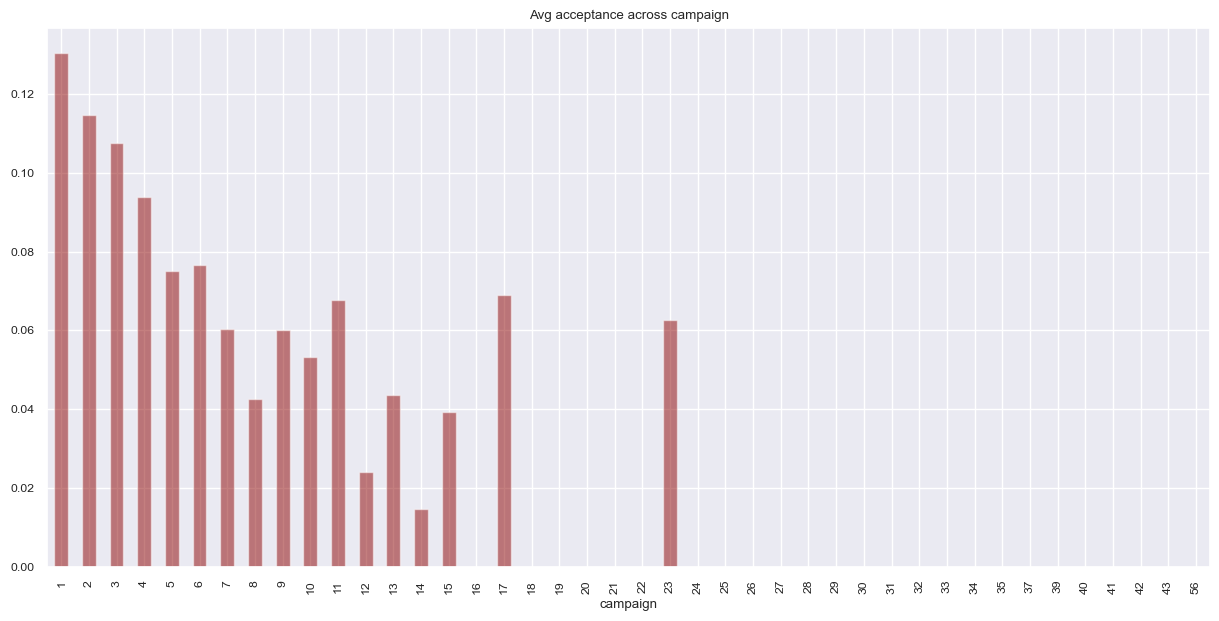

In [16]:
plt.figure(figsize = (15,7))
df_trans.groupby('campaign')['y'].mean().plot(kind='bar', title='Avg acceptance across campaign', color='darkred', alpha=0.5)
plt.savefig('images/accept_campaign.png')
plt.show()

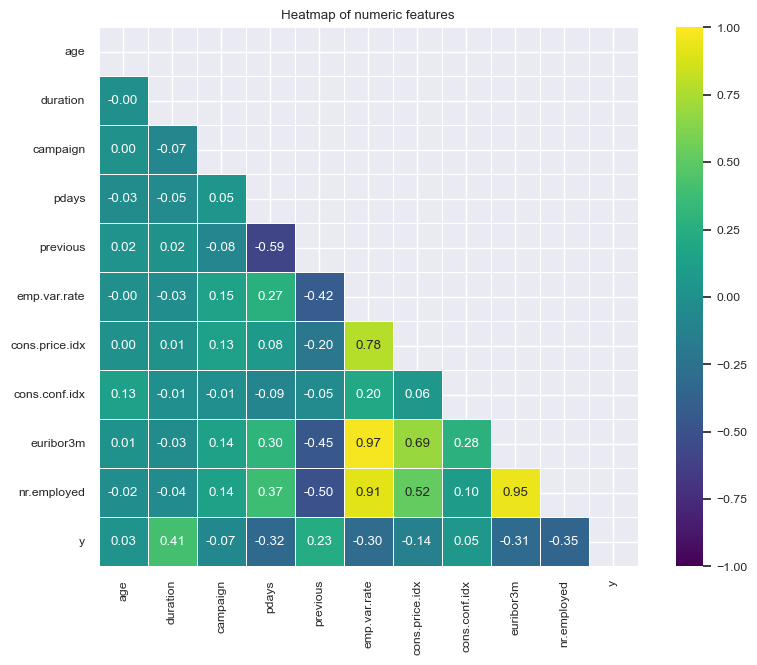

In [17]:
plt.figure(figsize = (10,7))
plt.rcParams.update({'font.size': 12})
numeric_corr = df_trans.corr(numeric_only=True)
sns.set(style="darkgrid",font_scale=0.8)
mask = np.triu(np.ones_like(numeric_corr, dtype=bool))
sns.heatmap(numeric_corr, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.title("Heatmap of numeric features")
plt.savefig('images/heatmap_numeric_features.png')
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [18]:
ans = "The business objective is to find the best model that can explain success of a client subscribes to the deposit. This model will help in increasing the campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers."
print(ans)

The business objective is to find the best model that can explain success of a client subscribes to the deposit. This model will help in increasing the campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.


In [19]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [20]:
#Categorical features transformation

#Ordinal encoder
dict = {'mar':3, 'apr': 4, 'may':5, 'jun':6, 'jul':7, 'aug': 8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df_trans.replace({'month':dict},inplace=True);


#OneHotEncoding
categorical_columns = df_trans.select_dtypes(include=['object', 'category']).columns

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_trans[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns)).reset_index()
tmp_data = df_trans.drop(categorical_columns, axis=1).reset_index()
clean_df = pd.concat([tmp_data, one_hot_df], axis=1)
clean_df.drop('index', axis=1, inplace=True)



In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41176 non-null  int64  
 1   month                          41176 non-null  int64  
 2   duration                       41176 non-null  int64  
 3   campaign                       41176 non-null  int64  
 4   pdays                          41176 non-null  int64  
 5   previous                       41176 non-null  int64  
 6   emp.var.rate                   41176 non-null  float64
 7   cons.price.idx                 41176 non-null  float64
 8   cons.conf.idx                  41176 non-null  float64
 9   euribor3m                      41176 non-null  float64
 10  nr.employed                    41176 non-null  float64
 11  y                              41176 non-null  int64  
 12  job_admin.                     41176 non-null 

In [22]:
clean_df.head()

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,5,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,5,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,5,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,5,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,5,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [23]:
data = clean_df
test_size = 0.3
random_state = 42
X = data.drop(['y'], axis=1) 
y = data.y
X_train_tmp, X_test_tmp, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

scaler_train = StandardScaler()
X_train = pd.DataFrame(scaler_train.fit_transform(X_train_tmp), columns=X_train_tmp.columns)
scaler_test = StandardScaler()
X_test = pd.DataFrame(scaler_test.fit_transform(X_test_tmp), columns=X_test_tmp.columns)

print( "X_train shape = " + str(X_train.shape) + "\n X_test shape = " + str(X_test.shape))
print( "y_train shape = " + str(y_train.shape) + "\n y_test shape = " + str(y_test.shape))
X_train.head()

X_train shape = (28823, 54)
 X_test shape = (12353, 54)
y_train shape = (28823,)
 y_test shape = (12353,)


,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.820136,-0.790757,-0.221099,0.519183,0.194245,-0.347187,0.645930,0.720122,0.888902,0.712893,0.329430,-0.582652,-0.540789,5.269295,-0.166337,-0.275694,-0.207429,-0.185218,-0.326851,-0.144184,-0.442859,-0.158114,-0.09144,-0.355565,0.808306,-0.625196,-0.043725,-0.335494,-0.243234,2.413889,-0.549196,-0.021242,-0.383765,-0.645155,-0.209513,0.513486,-0.513324,-0.010203,1.103866,-0.154503,-1.053286,0.463385,-0.154503,-0.425759,-1.319322,1.319322,-0.483974,-0.507438,1.940137,-0.495029,-0.498015,-0.337092,0.394933,-0.184415
1,-0.866934,-0.790757,6.555266,-0.572499,0.194245,-0.347187,-1.201046,-1.183131,-1.226210,-1.324419,-0.938512,-0.582652,1.849148,-0.189779,-0.166337,-0.275694,-0.207429,-0.185218,-0.326851,-0.144184,-0.442859,-0.158114,-0.09144,-0.355565,0.808306,-0.625196,-0.043725,-0.335494,-0.243234,2.413889,-0.549196,-0.021242,-0.383765,-0.645155,-0.209513,0.513486,-0.513324,-0.010203,-0.905907,-0.154503,0.949410,0.463385,-0.154503,-0.425759,0.757965,-0.757965,-0.483974,-0.507438,1.940137,-0.495029,-0.498015,-0.337092,0.394933,-0.184415
2,-0.770967,0.677168,-0.838184,-0.572499,0.194245,-0.347187,0.836997,-0.230640,0.953650,0.772288,0.841298,1.716291,-0.540789,-0.189779,-0.166337,-0.275694,-0.207429,-0.185218,-0.326851,-0.144184,-0.442859,-0.158114,-0.09144,-0.355565,-1.237155,1.599498,-0.043725,-0.335494,-0.243234,-0.414269,-0.549196,-0.021242,-0.383765,1.550016,-0.209513,0.513486,-0.513324,-0.010203,-0.905907,6.472354,-1.053286,-2.158035,6.472354,-0.425759,0.757965,-0.757965,-0.483974,-0.507438,-0.515427,2.020082,-0.498015,-0.337092,0.394933,-0.184415
3,0.188701,2.145093,0.145295,-0.208605,0.194245,1.680155,-0.118336,-0.652433,-0.319733,0.327113,0.395656,1.716291,-0.540789,-0.189779,-0.166337,-0.275694,-0.207429,-0.185218,-0.326851,-0.144184,-0.442859,-0.158114,-0.09144,2.812426,-1.237155,-0.625196,-0.043725,-0.335494,-0.243234,-0.414269,1.820842,-0.021242,-0.383765,-0.645155,-0.209513,0.513486,-0.513324,-0.010203,-0.905907,6.472354,-1.053286,-2.158035,6.472354,-0.425759,0.757965,-0.757965,-0.483974,1.970685,-0.515427,-0.495029,-0.498015,2.966548,-2.532078,-0.184415
4,0.380634,-0.790757,-0.197959,-0.208605,0.194245,-0.347187,-1.201046,-1.183131,-1.226210,-1.320382,-0.938512,-0.582652,-0.540789,-0.189779,-0.166337,-0.275694,-0.207429,-0.185218,-0.326851,-0.144184,-0.442859,6.324555,-0.09144,-0.355565,0.808306,-0.625196,-0.043725,-0.335494,-0.243234,2.413889,-0.549196,-0.021242,-0.383765,-0.645155,-0.209513,0.513486,-0.513324,-0.010203,-0.905907,-0.154503,0.949410,0.463385,-0.154503,-0.425759,0.757965,-0.757965,-0.483974,-0.507438,-0.515427,-0.495029,2.007971,-0.337092,0.394933,-0.184415


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [24]:
dc = DummyClassifier()
start = time.time()
dc.fit(X_train, y_train)
dc_time = time.time() - start
print('Baseline model accuracy for train data is {:.2f}'.format(dc.score(X_train, y_train)))
print('Baseline model accuracy for test data is {:.2f}'.format(dc.score(X_test, y_test)))
print('Baseline model training execution time: ' + str(round((dc_time * 1000),4)) + ' msec')

Baseline model accuracy for train data is 0.89
Baseline model accuracy for test data is 0.88
Baseline model training execution time: 3.1071 msec


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [25]:
lr = LogisticRegression()
start = time.time()
lr.fit(X_train, y_train)
lr_time = time.time() - start

### Problem 9: Score the Model

What is the accuracy of your model?

In [26]:
lr_train_acc = lr.score(X_train, y_train)
lr_test_acc = lr.score(X_test, y_test)

print('The accuracy of the Logistic Regression model for training data is {:.2f}'.format(lr_train_acc))
print('The accuracy of the Logistic Regression model for test data is {:.2f}'.format(lr_test_acc))
print('Logistic Regression model training execution time: ' + str(round((lr_time * 1000),4)) + ' msec')

The accuracy of the Logistic Regression model for training data is 0.91
The accuracy of the Logistic Regression model for test data is 0.91
Logistic Regression model training execution time: 82.8979 msec


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [27]:
knn = KNeighborsClassifier()
start = time.time()
knn.fit(X_train, y_train)
knn_time = time.time() - start
knn_train_acc = knn.score(X_train, y_train)
knn_test_acc = knn.score(X_test, y_test)
print('The accuracy of the KNeighborsClassifier model for training data is  {:.2f}'.format(knn_train_acc))
print('The accuracy of the KNeighborsClassifier model for test data is {:.2f}'.format(knn_test_acc))
print('KNeighborsClassifier model training execution time: ' + str(round((knn_time * 1000),4)) + ' msec')

The accuracy of the KNeighborsClassifier model for training data is  0.92
The accuracy of the KNeighborsClassifier model for test data is 0.89
KNeighborsClassifier model training execution time: 12.934 msec


In [28]:
dt = DecisionTreeClassifier()
start = time.time()
dt.fit(X_train, y_train)
dt_time = time.time() - start
dt_train_acc = dt.score(X_train, y_train)
dt_test_acc = dt.score(X_test, y_test)
print('The accuracy of the DecisionTreeClassifier model for training data is  {:.2f}'.format(dt_train_acc))
print('The accuracy of the DecisionTreeClassifier model for test data is {:.2f}'.format(dt_test_acc))
print('DecisionTreeClassifier model training execution time: ' + str(round((dt_time * 1000),4)) + ' msec')

The accuracy of the DecisionTreeClassifier model for training data is  1.00
The accuracy of the DecisionTreeClassifier model for test data is 0.88
DecisionTreeClassifier model training execution time: 134.11 msec


In [29]:
svc = SVC()
start = time.time()
svc.fit(X_train, y_train)
svc_time = time.time() - start
svc_train_acc = svc.score(X_train, y_train)
svc_test_acc = svc.score(X_test, y_test)
print('The accuracy of the SVC model for training data is  {:.2f}'.format(svc_train_acc))
print('The accuracy of the SVC model for test data is {:.2f}'.format(svc_test_acc))
print('SVC model training execution time: ' + str(round((svc_time * 1000),4)) + ' msec')

The accuracy of the SVC model for training data is  0.92
The accuracy of the SVC model for test data is 0.90
SVC model training execution time: 5607.9931 msec


In [30]:
model_comparison_df = pd.DataFrame({ 'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'], \
                          'Train Time (in msec)':[round((lr_time*1000),4), round((knn_time*1000),4), round((dt_time*1000),4), round((svc_time*1000),4)], \
                          'Train Accuracy':[lr_train_acc, knn_train_acc, dt_train_acc, svc_train_acc], \
                          'Test Accuracy':[lr_test_acc, knn_test_acc, dt_test_acc, svc_test_acc]})

print(model_comparison_df)

                 Model  Train Time (in msec)  Train Accuracy  Test Accuracy
0  Logistic Regression               82.8979        0.911911       0.907229
1                  KNN               12.9340        0.918607       0.890877
2        Decision Tree              134.1100        1.000000       0.877601
3                  SVM             5607.9931        0.924054       0.904962


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

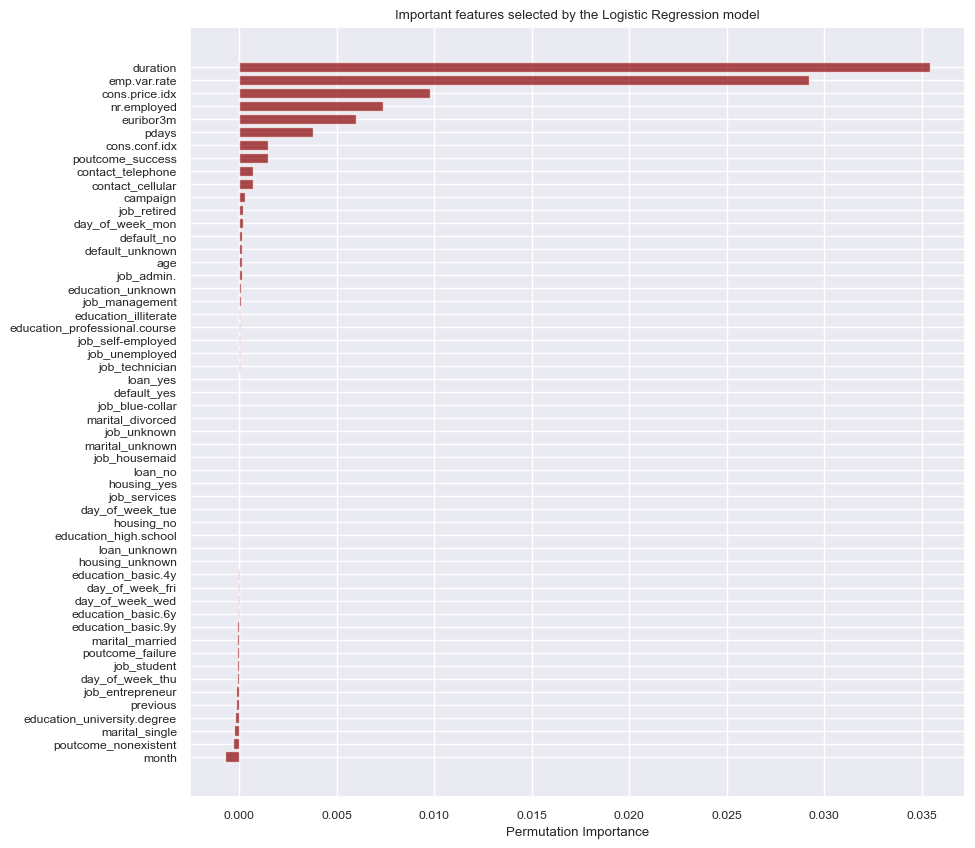

In [31]:
# Since Logistic Regression is the best performing model, lets use it to get the top features that were selected. 
# Best on the result, features will be selected for further analysis before they are dropped.

results = permutation_importance(lr, X_train, y_train, n_repeats=30, random_state=1)
important_features = results.importances_mean
sorted_idx = np.argsort(important_features)

sns.set(style="darkgrid",font_scale=0.8)
fig, axs = plt.subplots(figsize=(10, 10))
plt.barh(range(len(sorted_idx)), important_features[sorted_idx], color='darkred', alpha=0.7)
plt.yticks(range(len(sorted_idx)), X_test.columns[sorted_idx]);
plt.xlabel('Permutation Importance')
plt.title('Important features selected by the Logistic Regression model')
plt.savefig('images/lr_coeff.png')
plt.show()

## Feature engineering and exploration
The following features will be intestigated further: 
* non-categorical features : 'age', 'campaign', 'month', 'previous' 
* categorical features: 'job', 'education', 'marital', 'housing', 'loan', 'day_of_week', 'default'

Lets first examine the non-categorical features:
* a) 'age' - This feature will be dropped since (per correlation matrix) the correlation with 'y' is very low.
* b) 'campaign' - This feature will be dropped since (per correlation matrix) the correlation with 'y' is very low.
* c) 'month' - This feature will be dropped per the low ranking of the feature by the Logistic Regression model.
* d) 'previous' - This feature will be dropped since (per correlation matrix) the correlation with 'y' is very low (<0.3)

For the categorical features, decision of eliminating the features will be based on the relationship to 'y' in the plots to follow.
 

## Following plots used to determine the categorical features removal:
* categorical features: 'job', 'education', 'marital', 'housing', 'loan', 'day_of_week', 'default'

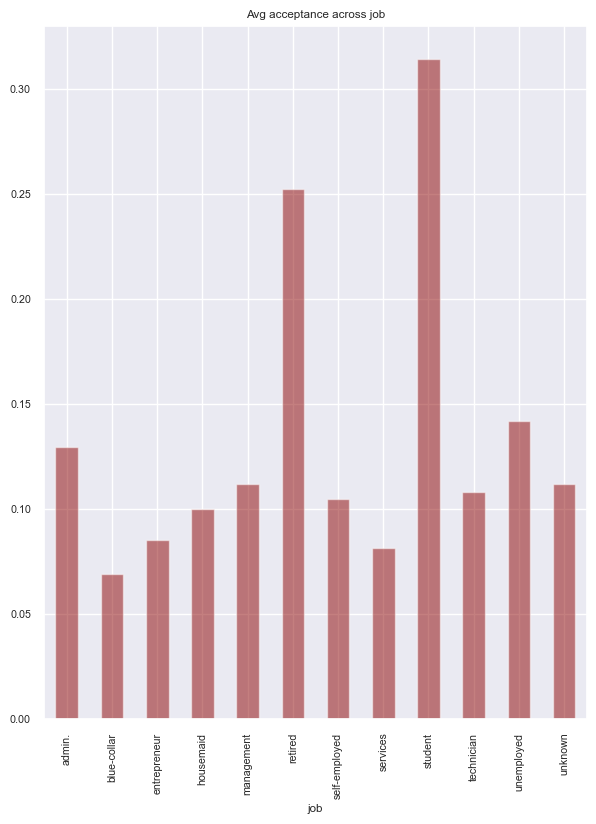

In [133]:
sns.set(style="darkgrid",font_scale=0.7)
plt.figure(figsize = (7,9))
df_trans.groupby('job')['y'].mean().plot(kind='bar', title='Avg acceptance across job', color='darkred', alpha=0.5)
plt.savefig('images/accept_job.png')
plt.show()

* Per the above plot 'job' feature will be kept since 'job_retired' and 'job_admin.' is selected as top 1/3 tier important features by Logestic Regression model.

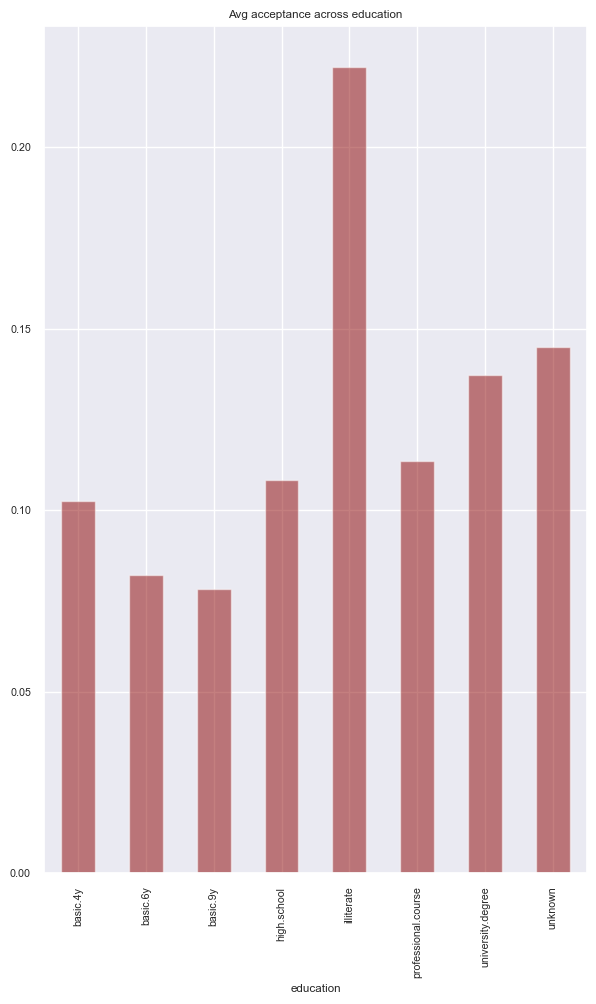

In [129]:
sns.set(style="darkgrid",font_scale=0.7)
plt.figure(figsize = (7,11))
df_trans.groupby('education')['y'].mean().plot(kind='bar', title='Avg acceptance across education', color='darkred', alpha=0.5)
plt.savefig('images/accept_education.png')
plt.show()

* This feature will be dropped because the 'unknown' was identified as important feature by the Logestic Regression model. This does not provide insight towards the business objective.

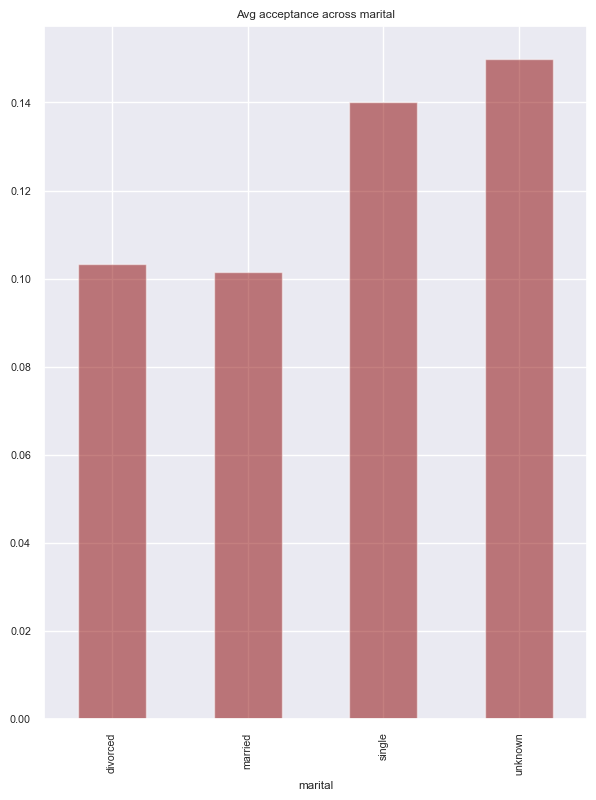

In [134]:
sns.set(style="darkgrid",font_scale=0.7)
plt.figure(figsize = (7,9))
df_trans.groupby('marital')['y'].mean().plot(kind='bar', title='Avg acceptance across marital', color='darkred', alpha=0.5)
plt.savefig('images/accept_marital.png')
plt.show()

* This feature will be dropped because the 'divorced' and 'unknown' were identified as important feature by the Logestic Regression model. 'unknown' does not provide insight towards the business objective. The total accepatnce is less than 50% and the distrubution of acceptance across is almost the same.

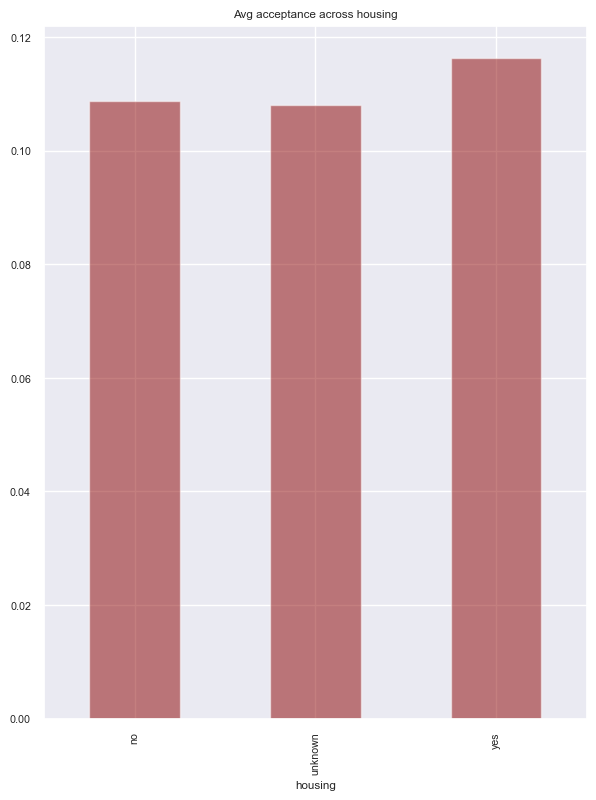

In [135]:
sns.set(style="darkgrid",font_scale=0.7)
plt.figure(figsize = (7,9))
df_trans.groupby('housing')['y'].mean().plot(kind='bar', title='Avg acceptance across housing', color='darkred', alpha=0.5)
plt.savefig('images/accept_housing.png')
plt.show()

* This feature will be dropped because the distribution across the 'housing' categories are almost the same. The total accepatance is ~30%.

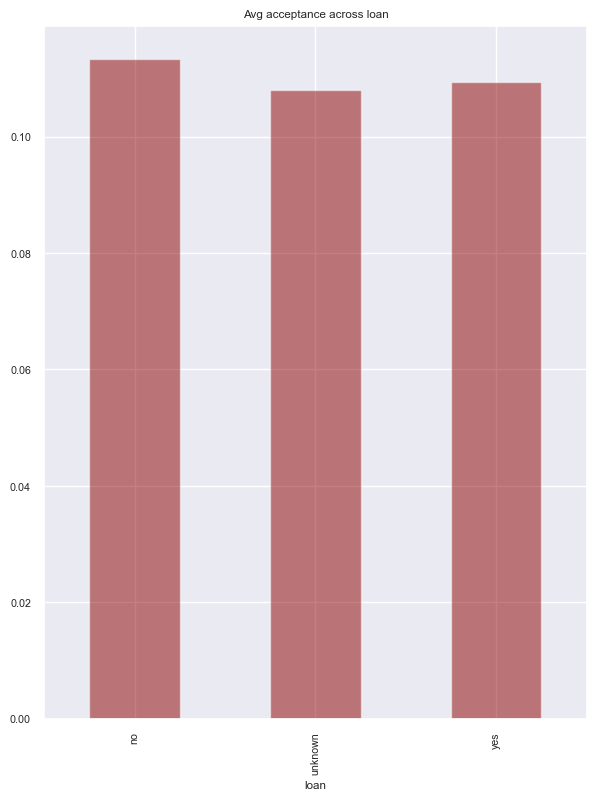

In [136]:
sns.set(style="darkgrid",font_scale=0.7)
plt.figure(figsize = (7,9))
df_trans.groupby('loan')['y'].mean().plot(kind='bar', title='Avg acceptance across loan', color='darkred', alpha=0.5)
plt.savefig('images/accept_loan.png')
plt.show()

* This feature will be dropped because the distribution across the 'loan' categories are almost the same. The total accepatance is ~30%.

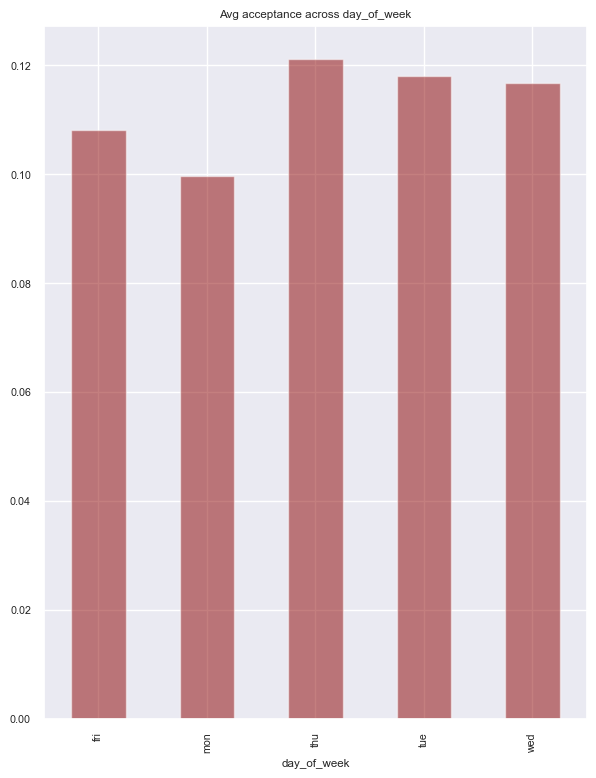

In [137]:
sns.set(style="darkgrid",font_scale=0.7)
plt.figure(figsize = (7,9))
df_trans.groupby('day_of_week')['y'].mean().plot(kind='bar', title='Avg acceptance across day_of_week', color='darkred', alpha=0.5)
plt.savefig('images/accept_day_of_week.png')
plt.show()

* This feature will be dropped because the distribution across the 'day_of_week' categories are almost the same. The total accepatance is ~55%.

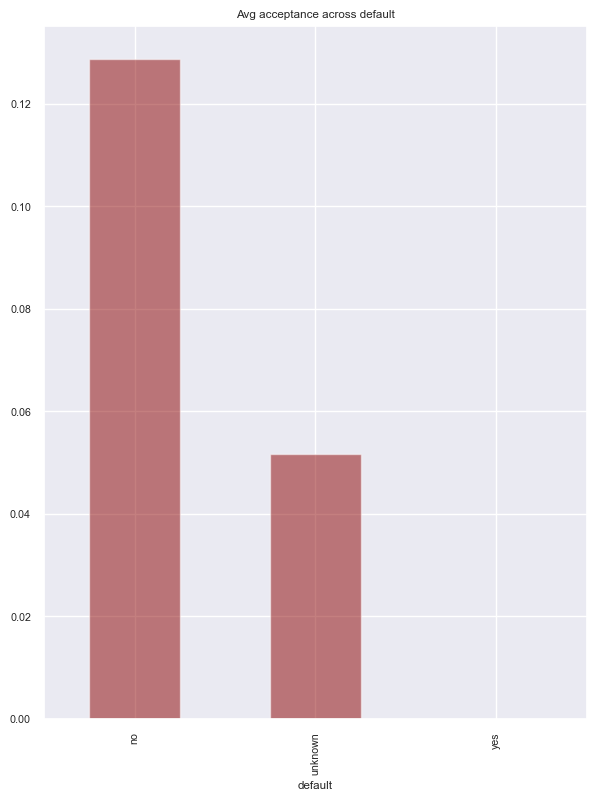

In [138]:
sns.set(style="darkgrid",font_scale=0.7)
plt.figure(figsize = (7,9))
df_trans.groupby('default')['y'].mean().plot(kind='bar', title='Avg acceptance across default', color='darkred', alpha=0.5)
plt.savefig('images/accept_default.png')
plt.show()

* This feature will be dropped becasue the know status of default is little over ~12% then therefore not relevent to the business objective.

In [76]:
#Drop:
# * non-categorical features : 'age', 'campaign', 'month', 'previous' 
# * categorical features: 'education', 'marital', 'housing', 'loan', 'day_of_week', 'default'
df_tmp = pd.DataFrame(df_trans)
df_tmp.drop(['age', 'campaign', 'month', 'previous', 'education', 'marital', 'housing', 'loan', 'day_of_week', 'default'], axis=1, inplace=True)
print(df_tmp.info())
#OneHotEncoding
categorical_columns = df_tmp.select_dtypes(include=['object', 'category']).columns

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(df_tmp[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns)).reset_index()
tmp_data = df_tmp.drop(categorical_columns, axis=1).reset_index()
c_df = pd.concat([tmp_data, one_hot_df], axis=1)
c_df.drop('index', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             41176 non-null  object 
 1   contact         41176 non-null  object 
 2   duration        41176 non-null  int64  
 3   pdays           41176 non-null  int64  
 4   poutcome        41176 non-null  object 
 5   emp.var.rate    41176 non-null  float64
 6   cons.price.idx  41176 non-null  float64
 7   cons.conf.idx   41176 non-null  float64
 8   euribor3m       41176 non-null  float64
 9   nr.employed     41176 non-null  float64
 10  y               41176 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 3.8+ MB
None


In [77]:
df_mod = c_df

In [78]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   duration              41176 non-null  int64  
 1   pdays                 41176 non-null  int64  
 2   emp.var.rate          41176 non-null  float64
 3   cons.price.idx        41176 non-null  float64
 4   cons.conf.idx         41176 non-null  float64
 5   euribor3m             41176 non-null  float64
 6   nr.employed           41176 non-null  float64
 7   y                     41176 non-null  int64  
 8   job_admin.            41176 non-null  float64
 9   job_blue-collar       41176 non-null  float64
 10  job_entrepreneur      41176 non-null  float64
 11  job_housemaid         41176 non-null  float64
 12  job_management        41176 non-null  float64
 13  job_retired           41176 non-null  float64
 14  job_self-employed     41176 non-null  float64
 15  job_services       

In [79]:
#Lets split the data into train and test

data = df_mod
test_size = 0.3
random_state = 42
X = data.drop(['y'], axis=1) 
y = data.y
X_train_tmp, X_test_tmp, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

#Standardize the data 
scaler_train = StandardScaler()
X_train = pd.DataFrame(scaler_train.fit_transform(X_train_tmp), columns=X_train_tmp.columns)
scaler_test = StandardScaler()
X_test = pd.DataFrame(scaler_test.fit_transform(X_test_tmp), columns=X_test_tmp.columns)

print( "X_train shape = " + str(X_train.shape) + "\n X_test shape = " + str(X_test.shape))
print( "y_train shape = " + str(y_train.shape) + "\n y_test shape = " + str(y_test.shape))
X_train.head()

X_train shape = (28823, 24)
 X_test shape = (12353, 24)
y_train shape = (28823,)
 y_test shape = (12353,)


,duration,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.221099,0.194245,0.645930,0.720122,0.888902,0.712893,0.329430,-0.582652,-0.540789,5.269295,-0.166337,-0.275694,-0.207429,-0.185218,-0.326851,-0.144184,-0.442859,-0.158114,-0.09144,-1.319322,1.319322,-0.337092,0.394933,-0.184415
1,6.555266,0.194245,-1.201046,-1.183131,-1.226210,-1.324419,-0.938512,-0.582652,1.849148,-0.189779,-0.166337,-0.275694,-0.207429,-0.185218,-0.326851,-0.144184,-0.442859,-0.158114,-0.09144,0.757965,-0.757965,-0.337092,0.394933,-0.184415
2,-0.838184,0.194245,0.836997,-0.230640,0.953650,0.772288,0.841298,1.716291,-0.540789,-0.189779,-0.166337,-0.275694,-0.207429,-0.185218,-0.326851,-0.144184,-0.442859,-0.158114,-0.09144,0.757965,-0.757965,-0.337092,0.394933,-0.184415
3,0.145295,0.194245,-0.118336,-0.652433,-0.319733,0.327113,0.395656,1.716291,-0.540789,-0.189779,-0.166337,-0.275694,-0.207429,-0.185218,-0.326851,-0.144184,-0.442859,-0.158114,-0.09144,0.757965,-0.757965,2.966548,-2.532078,-0.184415
4,-0.197959,0.194245,-1.201046,-1.183131,-1.226210,-1.320382,-0.938512,-0.582652,-0.540789,-0.189779,-0.166337,-0.275694,-0.207429,-0.185218,-0.326851,-0.144184,-0.442859,6.324555,-0.09144,0.757965,-0.757965,-0.337092,0.394933,-0.184415


## Logic Regression Hyperparameter Tuning

In [80]:
# Logistic Regression - get the best hyperparameters
lr = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=1, n_jobs=-1)
best_clf = clf.fit(X,y)

In [82]:
best_clf.best_estimator_
print(best_clf.best_estimator_.get_params())

{'C': 0.0001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [89]:
# Evaluate performance using the best hyperparameters

lr = LogisticRegression(C=0.0001, penalty='l1', solver='saga')
start = time.time()
lr.fit(X_train, y_train)
lr_time = time.time() - start
lr_train_acc = lr.score(X_train, y_train)
lr_test_acc = lr.score(X_test, y_test)

print('The accuracy of the Logistic Regression model using best hyper parameters for training data is {:.2f}'.format(lr_train_acc))
print('The accuracy of the Logistic Regression model using best hyper parameters for test data is {:.2f}'.format(lr_test_acc))
print('Logistic Regression model training execution time: ' + str(round((lr_time * 1000),4)) + ' msec')

The accuracy of the Logistic Regression model using best hyper parameters for training data is 0.89
The accuracy of the Logistic Regression model using best hyper parameters for test data is 0.88
Logistic Regression model training execution time: 21.405 msec


In [90]:
# Lets examine important features selected by Logestic Regression using the best hyperparameters.

from sklearn.compose import make_column_transformer, make_column_selector
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop= 'first'), selector), remainder = StandardScaler())
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'saga' ,random_state = 42))
lgr_pipe = Pipeline([('transformer', transformer), ('selector', extractor), ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])
lgr_pipe.fit(X_train, y_train)
feature_names = lgr_pipe.named_steps['transformer'].get_feature_names_out()
selected_features = feature_names[ [int(i[1:]) for i in lgr_pipe.named_steps['selector'].get_feature_names_out()]] 
clean_names = [i.split('__')[-1] for i in selected_features]
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': lgr_pipe.named_steps['lgr'].coef_[0]})
coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)

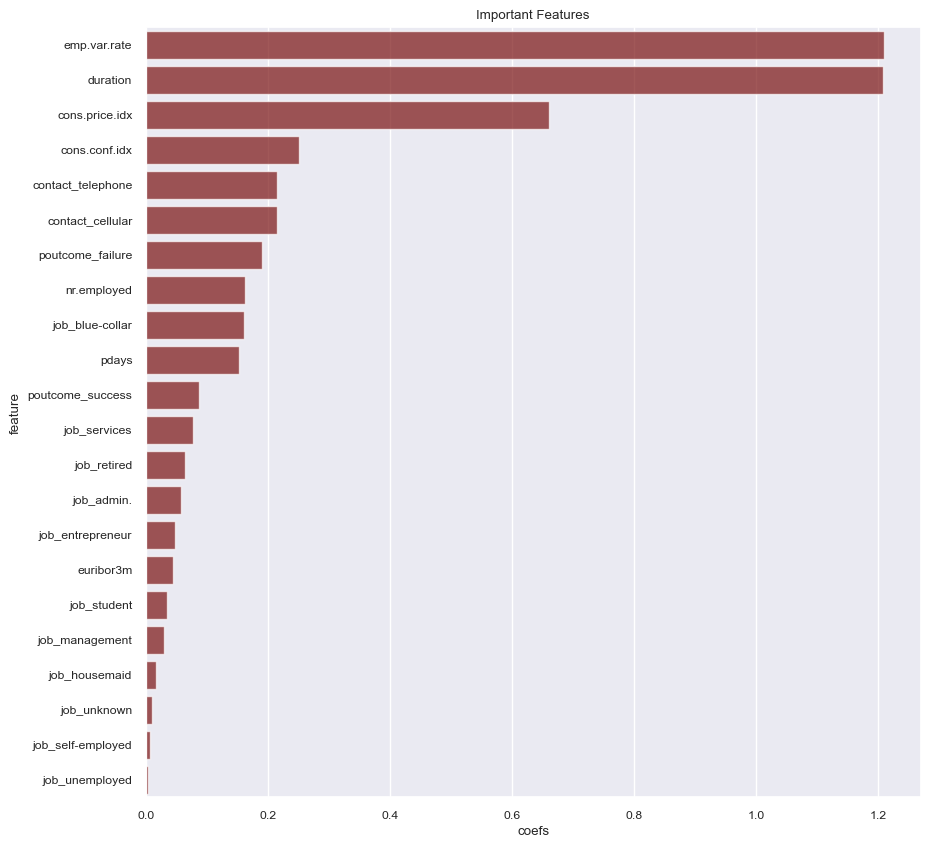

In [112]:
sns.set(style="darkgrid",font_scale=0.8)

fig, axs = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.barplot(y = coef_df.feature, x=coef_df.coefs, orient = 'h', ci=None, alpha=0.7, color='darkred', ax=axs)
ax.set_title("Important Features")
plt.savefig('images/lr_best_hyper_imp_features.png')

In [92]:
# KNN - get the best hyperparameters
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [93]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [94]:
best_gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [95]:
# get the best score
best_gs.best_score_

0.9044513132409552

In [96]:
# get the hyperparameters with the best score
best_gs.best_params_
print(best_gs.best_estimator_.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


In [97]:
# Evaluate performance using the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform', algorithm = 'auto', metric = 'minkowski')
start = time.time()
knn.fit(X_train, y_train)
knn_time = time.time() - start
knn_train_acc = knn.score(X_train, y_train)
knn_test_acc = knn.score(X_test, y_test)
print('The accuracy of the KNeighborsClassifier model using best hyper parameters for training data is  {:.2f}'.format(knn_train_acc))
print('The accuracy of the KNeighborsClassifier model using best hyper parameters for test data is {:.2f}'.format(knn_test_acc))
print('KNeighborsClassifier model training execution time: ' + str(round((knn_time * 1000),4)) + ' msec')

The accuracy of the KNeighborsClassifier model using best hyper parameters for training data is  0.92
The accuracy of the KNeighborsClassifier model using best hyper parameters for test data is 0.90
KNeighborsClassifier model training execution time: 7.7181 msec


In [98]:
# Decision Tree - get the best hyperparameters
dt = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [99]:
# Instantiate the grid search model
dtgs = GridSearchCV(estimator=dt, param_grid=params, cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")
best_dtgs = dtgs.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [100]:
best_dtgs.best_estimator_
print(best_dtgs.best_estimator_.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [101]:
# Evaluate performance using the best hyperparameters

dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42, min_samples_split=2, splitter='best')
start = time.time()
dt.fit(X_train, y_train)
dt_time = time.time() - start
dt_train_acc = dt.score(X_train, y_train)
dt_test_acc = dt.score(X_test, y_test)
print('The accuracy of the DecisionTreeClassifier model using best hyper parameters for training data is  {:.2f}'.format(dt_train_acc))
print('The accuracy of the DecisionTreeClassifier model using best hyper parameters for test data is {:.2f}'.format(dt_test_acc))
print('DecisionTreeClassifier model training execution time: ' + str(round((dt_time * 1000),4)) + ' msec')

The accuracy of the DecisionTreeClassifier model using best hyper parameters for training data is  0.92
The accuracy of the DecisionTreeClassifier model using best hyper parameters for test data is 0.91
DecisionTreeClassifier model training execution time: 37.5171 msec


In [104]:
# SVM - get the best hyperparameters
svm = SVC()
#Hyperparamter tuning using Gridsearch
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}

grid = GridSearchCV(svm,param_grid, cv=3, verbose=1, scoring="accuracy", n_jobs = -1)

In [105]:
#Fitting the model
grid.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=1)

In [106]:
#Calculating the accuracy of tuned model
grid_svc = grid.predict(X_test)
accuracy_score(y_test,grid_svc)

0.9039099813810411

In [107]:
#Classification report 
print(classification_report(y_test,grid_svc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10929
           1       0.66      0.34      0.45      1424

    accuracy                           0.90     12353
   macro avg       0.79      0.66      0.70     12353
weighted avg       0.89      0.90      0.89     12353



In [108]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [109]:
# Evaluate performance using the best hyperparameters

svc = SVC(C=100, gamma=0.01, kernel='rbf', degree=3, decision_function_shape='ovr', tol=0.001, verbose=False)
start = time.time()
svc.fit(X_train, y_train)
svc_time = time.time() - start
svc_train_acc = svc.score(X_train, y_train)
svc_test_acc = svc.score(X_test, y_test)
print('The accuracy of the SVC model using best hyper parameters for training data is  {:.2f}'.format(svc_train_acc))
print('The accuracy of the SVC model using best hyper parameters for test data is {:.2f}'.format(svc_test_acc))
print('SVC model training execution time: ' + str(round((svc_time * 1000),4)) + ' msec')

The accuracy of the SVC model using best hyper parameters for training data is  0.92
The accuracy of the SVC model using best hyper parameters for test data is 0.90
SVC model training execution time: 5143.4753 msec


In [110]:
# Lets compare the performance of the three models using the best hyperparameters per model.

model_comparison_df = pd.DataFrame({ 'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'], \
                          'Train Time (in msec)':[round((lr_time*1000),4), round((knn_time*1000),4), round((dt_time*1000),4), round((svc_time*1000),4)], \
                          'Train Accuracy':[lr_train_acc, knn_train_acc, dt_train_acc, svc_train_acc], \
                          'Test Accuracy':[lr_test_acc, knn_test_acc, dt_test_acc, svc_test_acc]})

print(model_comparison_df)

                 Model  Train Time (in msec)  Train Accuracy  Test Accuracy
0  Logistic Regression               21.4050        0.888457       0.884724
1                  KNN                7.7181        0.916803       0.903424
2        Decision Tree               37.5171        0.917774       0.911277
3                  SVM             5143.4753        0.917323       0.903910


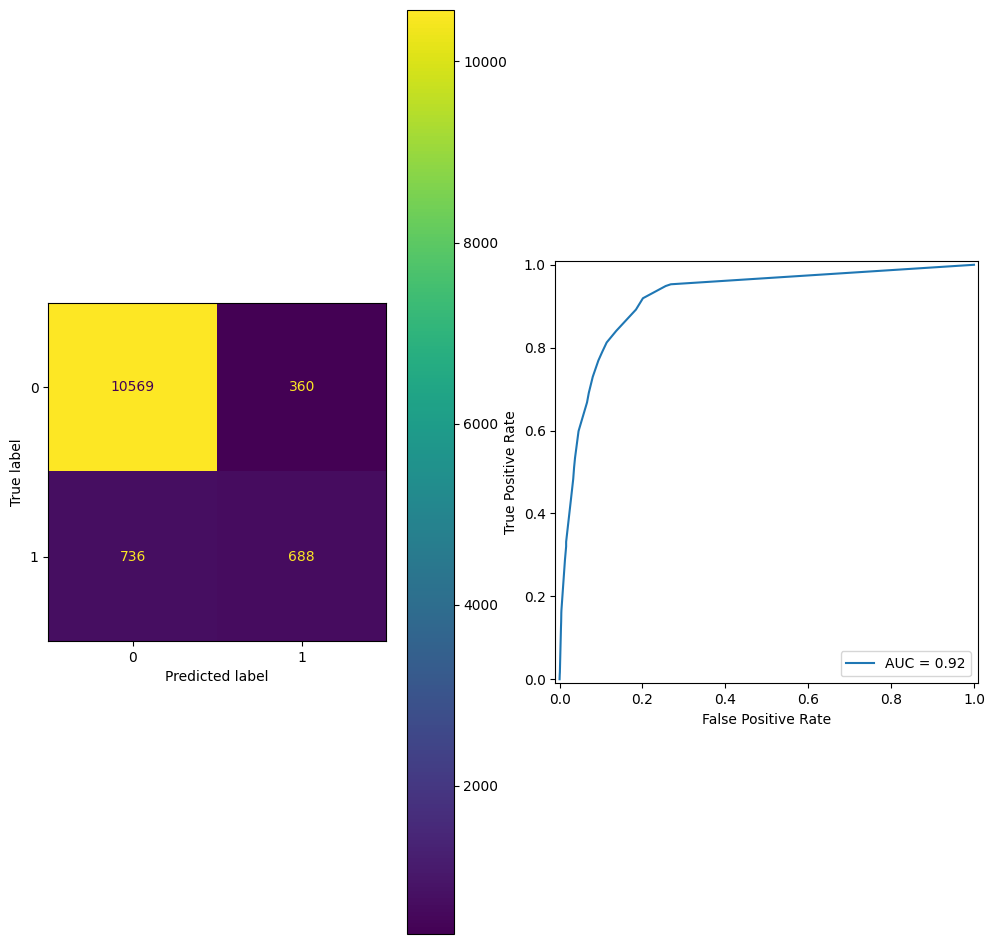

In [143]:
# Given the overall best performance is Decision Tree, lets evalute the ROC
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import auc as skl_auc
sns.reset_orig() 
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
#fig.set_size_inches(12, 12)


# Confusion Matrix
cm = confusion_matrix(y_test, dt.predict(X_test), labels = dt.classes_)
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp_cm.plot(ax=ax[0])

fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1], pos_label=1)
disp_roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=skl_auc(fpr, tpr))
disp_roc.plot(ax=ax[1])

fp = cm[0][1]
fn = cm[1][0]
auc = round(skl_auc(fpr, tpr), 2)

plt.savefig('images/test_dt_confusion_matrix.png')
plt.show()

In [146]:
#confusion matrix and ROC curve of Decision Tree
grid_dt = dtgs.predict(X_test)
accuracy_score(y_test,grid_dt)
print(classification_report(y_test,grid_dt))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10929
           1       0.66      0.48      0.56      1424

    accuracy                           0.91     12353
   macro avg       0.80      0.73      0.75     12353
weighted avg       0.90      0.91      0.91     12353



##### Questions

##### Taking a directed campaign approach by using the identified best classification model to help narrow the target population to high quality and affordable set of potential buying customers, we must be careful of (risk):
* creating a negative impacted on the targeted population as a side effect of the targeted personilized campaign
* reducing the success of a client subscribes to the deposit actieved thus far.
* increase waistage of resources (e.g. human effort, phone calls, time)

Becasue we are dealing with imbalanced data we will look at F1-score which is 56% the model will classify subscriber as yes. We can also look at the AUC (which is 92%) to determine how well the model will perform separating between subscribe - yes or no.  

Further analysis need to be execute to improve the f1-score to address the above identified risks.  